In [145]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

np.random.seed(2018)
plt.ion()

$$ y(t) = y_{0} + v_{0}t + \frac{1}{2}at^{2}$$

In [186]:
num_samples = 200
t = np.random.random(size=num_samples) * 5

y0 = 10.0 
v0 = 20
a = -9.8
noise = np.random.normal(loc=0, scale=2, size=num_samples)

y = y0 + v0 * t + 0.5 * a * t**2 + noise

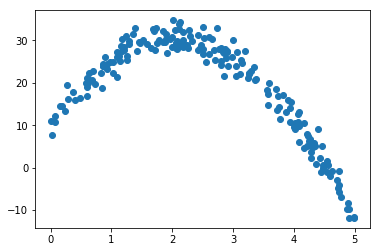

In [187]:
plt.scatter(t, y);

In [188]:
feature_1 = t
feature_2 = t**2
X = np.vstack((feature_1, feature_2)).T
X.shape

(200, 2)

In [189]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X = poly.fit_transform(t[:, np.newaxis])
X.shape

(200, 2)

In [190]:
model = LinearRegression(fit_intercept=True)

In [191]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

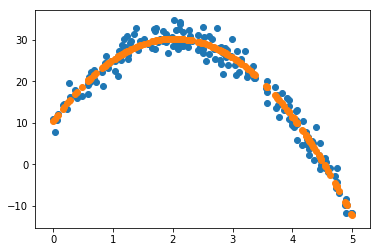

In [192]:
plt.scatter(t, y);
plt.scatter(t, model.predict(X));


In [193]:
model.coef_

array([ 19.6337543,  -4.8367566])

In [194]:
pipeline = Pipeline([
    ('polynomial_features', PolynomialFeatures(degree=2, include_bias=False)),
    ('linear_regression', LinearRegression(fit_intercept=True))])

In [195]:
pipeline.fit(t[:, np.newaxis], y)

Pipeline(memory=None,
     steps=[('polynomial_features', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)), ('linear_regression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

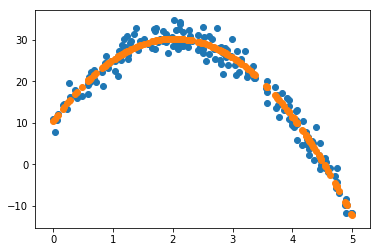

In [196]:
plt.scatter(t, y);
plt.scatter(t, pipeline.predict(t[:, np.newaxis]));

In [197]:
mean_squared_error(y, pipeline.predict(t[:, np.newaxis]))

4.2176968095292704

In [ ]:
# I guess we could also try this as a probabilistic model